In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
filein = os.path.join("..", "..", "Data", "neutrons", "LGND_200_exampleNeutron_part1.csv")
df = pd.read_csv(filein, index_col=False)

In [3]:
df.head()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID
0,2112,0,0.000000,1.000000,0.000000,244.956000,-32.281800,-177.399000,43.360500,0.000000,0.000000,0,1,primaryParticle,666
1,22,1,0.000000,0.497713,60.976735,529.246018,458.146976,367.037670,0.122311,0.262676,0.404672,0,5,neutronInelastic,666
2,22,1,0.000015,0.470814,61.446747,563.873306,532.512596,481.603263,-0.030075,0.305982,0.356561,0,5,compt,666
3,22,1,0.000249,0.179635,61.457331,563.670619,534.574704,484.006237,0.125489,-0.054530,-0.116395,0,5,compt,666
4,22,1,0.000015,0.141682,61.482854,569.015723,532.252040,479.048503,-0.063748,0.019056,-0.125087,0,5,compt,666


In [99]:
events_ar41 = df[(df.PID==1000180410) & (df.creatorprocess=='nCapture')].eventnumber.unique()
print("[Info] There are {} events of Ar41 de-excitation".format(len(events_ar41)))

[Info] There are 79 events of Ar41 de-excitation


In [100]:
gammas = df[(df.PID==22) & (df.eventnumber.isin(events_ar41))]
gammas

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID
7233,22,1,0.000000,0.562549,112.620190,211.057728,28.209353,-87.723080,-0.374525,-0.045609,0.417267,99,11,neutronInelastic,666
7234,22,1,0.000015,0.350823,112.705724,193.985821,26.130347,-68.702858,-0.069286,0.292920,0.180207,99,11,compt,666
7235,22,1,0.000038,0.268917,112.936518,180.321105,83.900730,-33.162060,-0.211296,0.027985,0.163973,99,11,compt,666
7236,22,1,0.000015,0.144206,113.158164,128.110994,90.815697,7.354730,0.020516,0.065570,-0.126787,99,11,compt,666
7237,22,1,0.000015,0.095406,113.214316,130.505977,98.469995,-7.445768,-0.004632,0.011473,0.094600,99,11,compt,666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341493,22,22,0.003178,0.000000,25.918940,529.449398,121.749732,78.089202,-0.000000,-0.000000,0.000000,4758,32,phot,666
341497,22,1,0.000000,2.784901,25.659176,683.987354,148.866715,-123.052400,2.391327,1.372966,0.390122,4758,4,nCapture,666
341498,22,1,0.000249,1.313404,25.694950,693.196291,154.153972,-121.550049,0.800487,0.911160,-0.504023,4758,4,compt,666
341499,22,1,0.000249,0.703492,26.377032,817.823578,296.011811,-200.021065,0.653281,-0.044867,-0.257121,4758,4,compt,666


In [101]:
first_gammas = gammas.sort_values("time").groupby(["eventnumber", "tracknumber"]).first()

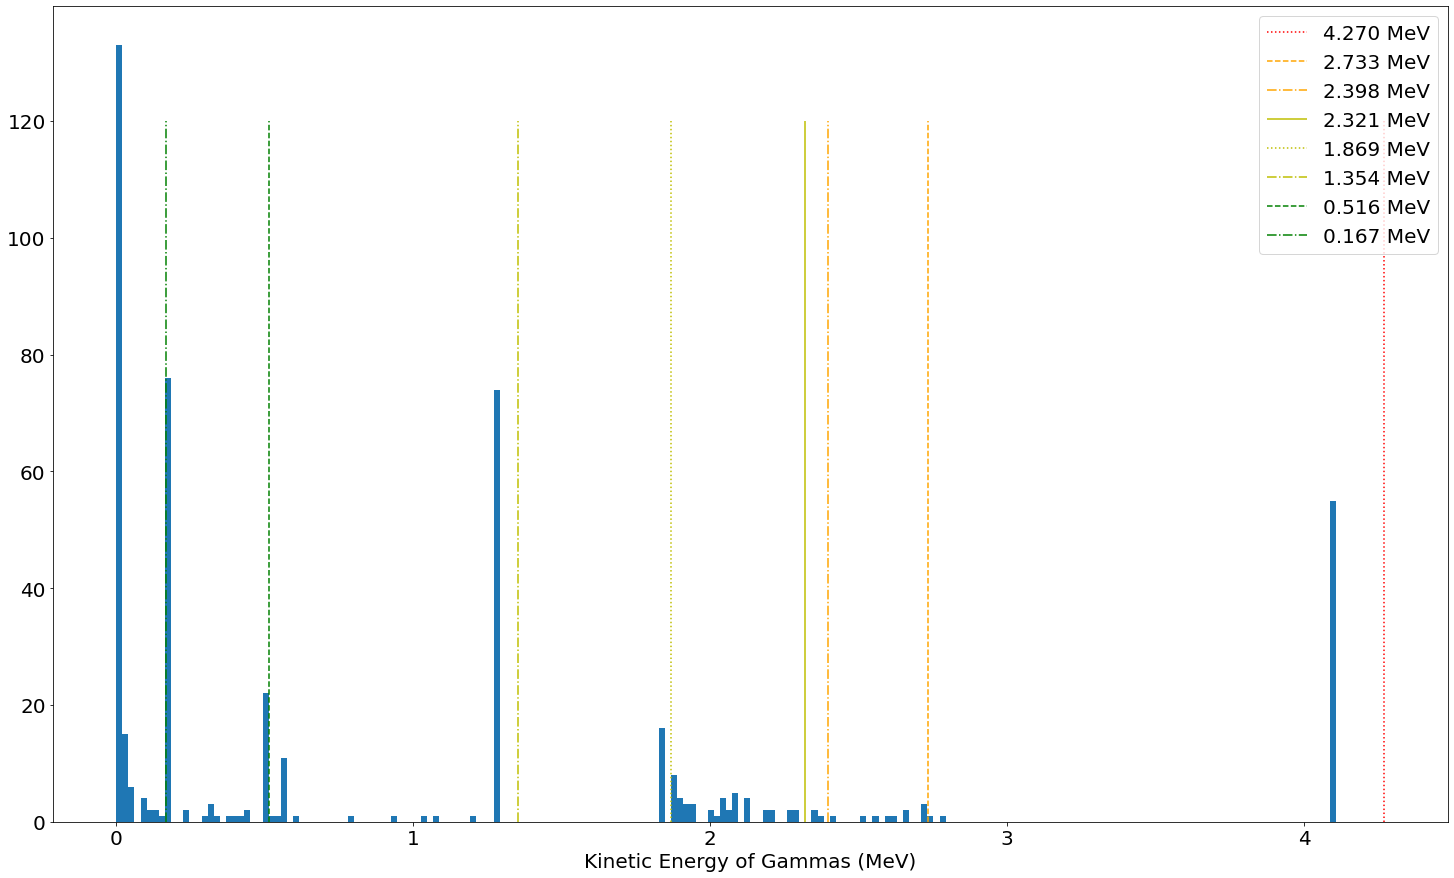

In [102]:
plt.hist(first_gammas.kineticenergy, bins=200, alpha=1)
ymax = 120
#plt.vlines(x=6.099, ymin=0, ymax=ymax, color='r', linestyles='solid', label="6.099 MeV")
plt.vlines(x=4.270, ymin=0, ymax=ymax, color='r', linestyles='dotted', label="4.270 MeV")
#plt.vlines(x=3.968, ymin=0, ymax=ymax, color='r', linestyles='dashed', label="3.968 MeV")
#plt.vlines(x=3.327, ymin=0, ymax=ymax, color='r', linestyles='dashdot', label="3.327 MeV")
#plt.vlines(x=3.010, ymin=0, ymax=ymax, color='orange', linestyles='solid', label="3.010 MeV")
#plt.vlines(x=2.949, ymin=0, ymax=ymax, color='orange', linestyles='dotted', label="2.949 MeV")
plt.vlines(x=2.733, ymin=0, ymax=ymax, color='orange', linestyles='dashed', label="2.733 MeV")
plt.vlines(x=2.398, ymin=0, ymax=ymax, color='orange', linestyles='dashdot', label="2.398 MeV")
plt.vlines(x=2.321, ymin=0, ymax=ymax, color='y', linestyles='solid', label="2.321 MeV")
plt.vlines(x=1.869, ymin=0, ymax=ymax, color='y', linestyles='dotted', label="1.869 MeV")
#plt.vlines(x=1.635, ymin=0, ymax=ymax, color='y', linestyles='dashed', label="1.635 MeV")
plt.vlines(x=1.354, ymin=0, ymax=ymax, color='y', linestyles='dashdot', label="1.354 MeV")
#plt.vlines(x=1.035, ymin=0, ymax=ymax, color='g', linestyles='solid', label="1.035 MeV")
plt.vlines(x=0.516, ymin=0, ymax=ymax, color='g', linestyles='dashed', label="0.516 MeV")
plt.vlines(x=0.167, ymin=0, ymax=ymax, color='g', linestyles='dashdot', label="0.167 MeV")
plt.legend()
plt.xlabel("Kinetic Energy of Gammas (MeV)")
plt.show()

In [103]:
df[df.creatorprocess=="nCapture"].eventnumber.nunique()

239

In [20]:
# loooking for scintillation
df.creatorprocess.unique()

array(['primaryParticle', 'neutronInelastic', 'compt', 'phot', 'msc',
       'eIoni', 'hadElastic', 'ionIoni', 'annihil', 'nCapture',
       'RadioactiveDecay', 'eBrem', 'conv', 'Transportation', 'hIoni'],
      dtype=object)

In [23]:
df[df.creatorprocess=="nCapture"].eventnumber.nunique()

239

In [26]:
df[(df.PID==1000180410) & (df.creatorprocess=="nCapture")].eventnumber.nunique()

79

In [27]:
79/239

0.3305439330543933